In [1]:
pip install arc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ARC-Alkali-Rydberg-Calculator

Note: you may need to restart the kernel to use updated packages.


In [2]:
from __future__ import division, print_function, absolute_import

from arc._database import sqlite3, UsedModulesARC
import csv
import gzip
from math import exp, sqrt
from mpmath import angerj
import numpy as np
import re
import shutil

from numpy.linalg import eigh


from scipy.constants import physical_constants, pi, epsilon_0, hbar
from scipy.constants import k as C_k
from scipy.constants import c as C_c
from scipy.constants import h as C_h
from scipy.constants import e as C_e
from scipy.constants import m_e as C_m_e

# for matrices
from numpy import floor

In [3]:
# Configure the matplotlib graphics library and configure it to show
# figures inline in the notebook

%matplotlib inline
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
from IPython.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
# import sys, os
# rootDir = '/path/to/arc/directory' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
# sys.path.insert(0,rootDir)
# import sys, os
# sys.path.insert(0,"..")

import arc
from arc import *                 #Import ARC (Alkali Rydberg Calculator)

Found  312  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


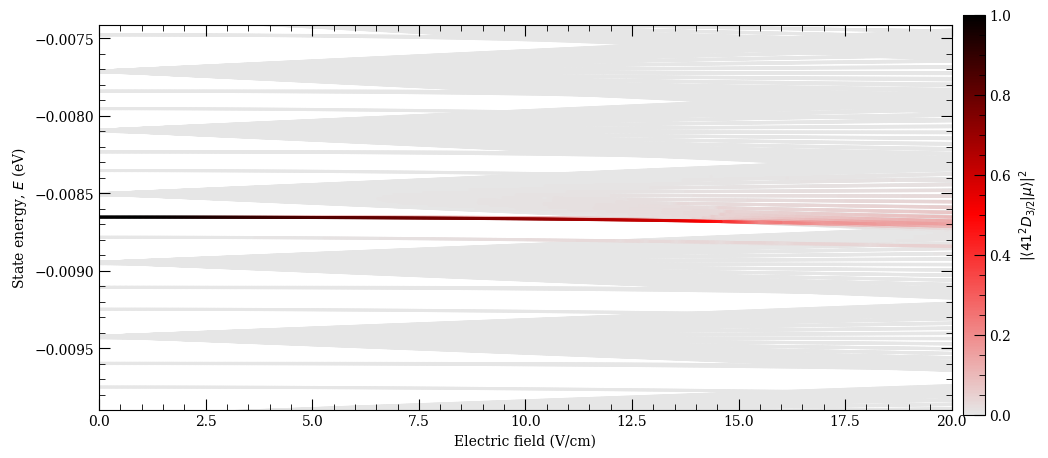

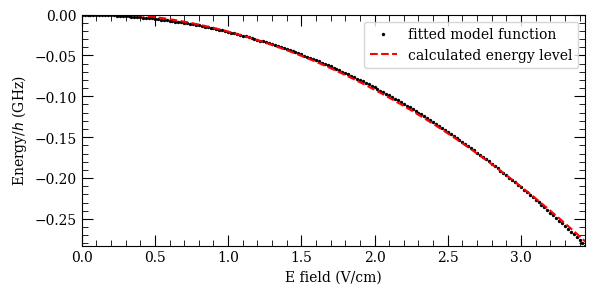

47.43850 MHz cm^2 / V^2 


In [5]:
#Stark Map Caclulator
#====================
#Initialise a Stark-shift Solver for Caesium
calc = StarkMap(Rubidium())

#Target state
n0=41;l0=2;j0=1.5;mj0=1.5;
#Define max/min n values in basis
nmax=45
nmin=37
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin=0. #Min E field (V/m)
Emax=2000. #Max E field (V/m)
N=1001 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=1,highlightState = True)
calc.showPlot(interactive = False)
#Return Polarizability of target state
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

In [13]:
calc = StarkMap(Rubidium())


stateN = [41]
eFieldRange = np.array([[1,30]])*1.e2 # V/m ranges
polarizabilityList = []
print("State\t\tPolarizability (MHz cm^2 / V^2)\t\tElectric field range (V/cm)")

for i in range(len(stateN)):
    n = stateN[i]
    calc.defineBasis(n, 2, 1.5, 0.5, n-5, n+5, 20) #,progressOutput=True)
    minEfield = eFieldRange[i][0]
    maxEfield = eFieldRange[i][1]
    calc.diagonalise(np.linspace(minEfield,maxEfield,100)) # ,progressOutput=True)
    p = calc.getPolarizability( minStateContribution=0.9)
    print("%s\t%.3e\t\t\t\t%.2f-%.2f" % \
        (printStateString(n,2, 1.5), p, minEfield/100.,maxEfield/100.))
    polarizabilityList.append(p)

State		Polarizability (MHz cm^2 / V^2)		Electric field range (V/cm)
41 D 3/2	5.845e+00				1.00-30.00


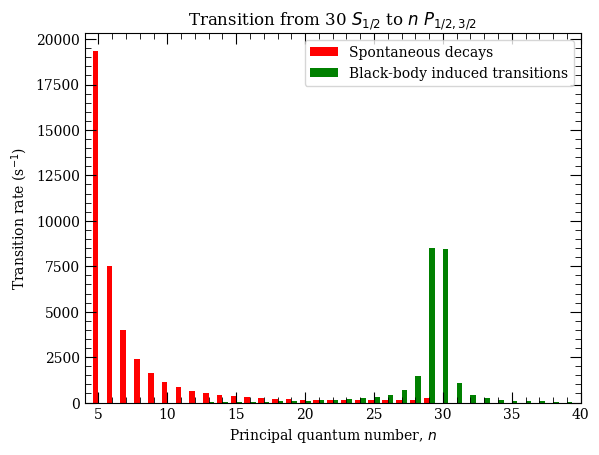

In [2]:
atom = Rubidium()

pqn = []
y = []
ybb = []

for n in range(5, 40):
    pqn.append(n)
    noBBR = atom.getTransitionRate(
        30, 0, 0.5, n, 1, 0.5, temperature=0.1
    ) + atom.getTransitionRate(30, 0, 0.5, n, 1, 1.5, temperature=0.1)
    withBBR = atom.getTransitionRate(
        30, 0, 0.5, n, 1, 0.5, temperature=300.0
    ) + atom.getTransitionRate(30, 0, 0.5, n, 1, 1.5, temperature=300.0)
    y.append(noBBR)
    ybb.append(withBBR - noBBR)

pqn = np.array(pqn)
y = np.array(y)
ybb = np.array(ybb)

width = 0.4
plt.bar(pqn - width / 2.0, y, width=width, color="r")
plt.bar(pqn + width / 2.0, ybb, width=width, color="g")
plt.xlabel("Principal quantum number, $n$")
plt.ylabel(r"Transition rate (s${}^{-1}$)")
plt.title("Transition from 30 $S_{1/2}$ to $n$ $P_{1/2,3/2}$")
plt.legend(
    ("Spontaneous decays", "Black-body induced transitions"), fontsize=10
)
plt.xlim(4, 40)
plt.show()

display(
    HTML(
        "Lifetime (0 K) &tau;<sub>0</sub> = %.2f &mu;s"
        % (atom.getStateLifetime(30, 0, 0.5) * 1.0e6)
    )
)
display(
    HTML(
        "Lifetime (300 K) &tau;<sub>eff</sub> = %.2f &mu;s"
        % (
            atom.getStateLifetime(
                30, 0, 0.5, temperature=300.0, includeLevelsUpTo=39
            )
            * 1.0e6
        )
    )
)

In [21]:
atom = Rubidium()
print("%.2e s" % (atom.getStateLifetime(200, 0, 0.5)))

9.60e-03 s


In [2]:
atom = Rubidium()
print("Rb Excitation 5P_{1/2} -> 41D_{3/2}")
n1 = 5
l1 = 1
j1 = 0.5
# Initial State
n2 = 41
l2 = 2
j2 = 1.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 41D_{3/2}
lambda = 475.239 nm
omega/2pi = 630.825 THz


In [12]:
atom = Rubidium()
print("Rb Excitation 5S_{1/2} -> 5P_{1/2}")
n1 = 5
l1 = 0
j1 = 0.5
# Initial State
n2 = 5
l2 = 1
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)


Rb Excitation 5S_{1/2} -> 5P_{1/2}
lambda = 794.979 nm
omega/2pi = 377.107 THz


In [8]:
atom = Rubidium()
print("Rb Excitation 5P_{1/2} -> 41S_{1/2}")
n1 = 5
l1 = 1
j1 = 0.5
# Initial State
n2 = 41
l2 = 0
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 41S_{1/2}
lambda = 475.391 nm
omega/2pi = 630.623 THz


In [6]:
atom = Rubidium()
print("Rb Excitation 5P_{1/2} -> 80S_{1/2}")
n1 = 5
l1 = 1
j1 = 0.5
# Initial State
n2 = 80
l2 = 0
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 80S_{1/2}
lambda = 474.085 nm
omega/2pi = 632.361 THz


In [15]:
atom = Rubidium()
print("Rb Excitation 5P_{1/2} -> 81S_{1/2}")
n1 = 5
l1 = 1
j1 = 0.5
# Initial State
n2 = 81
l2 = 0
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 81S_{1/2}
lambda = 474.074 nm
omega/2pi = 632.375 THz


In [5]:
atom = Rubidium()
print("Rb Excitation 80S_{1/2} -> 81P_{1/2}")
n1 = 80
l1 = 0
j1 = 0.5
# Initial State
n2 = 81
l2 = 0
j2 = 0.5
# Final State
print(
    "lambda = %.3f mm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e3)
)
print(
    "omega/2pi = %.3f GHz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-9)
)

Rb Excitation 80S_{1/2} -> 81P_{1/2}
lambda = 21.100 mm
omega/2pi = 14.208 GHz


In [20]:
waist = 50e-6  # 50 mu m
P = 10.0e-3  # 10 mW
q = 0  # laser drives pi transition
rabiFreq = atom.getRabiFrequency(8, 1, 1.5, 0.5, 52, 2, 1.5, q, P, waist)
print("rabi Frequency = 2 pi x %.2f MHz" % (rabiFreq / (2 * np.pi) * 1e-6))

rabi Frequency = 2 pi x 2.42 MHz


In [11]:
atom = Rubidium()
print("Rb Excitation 80S_{1/2} -> 81P_{1/2}")
n1 = 80
l1 = 0
j1 = 0.5
# Initial State
n2 = 81
l2 = 1
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e1)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 80S_{1/2} -> 81P_{1/2}
lambda = 0.144 nm
omega/2pi = 0.021 THz


In [3]:
atom = Rubidium()
print("Rb Excitation 5P_{3/2} -> 100S_{1/2}")
n1 = 5
l1 = 1
j1 = 1.5
# Initial State
n2 = 100
l2 = 0
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{3/2} -> 100S_{1/2}
lambda = 479.328 nm
omega/2pi = 625.444 THz


In [3]:
atom = Rubidium()
print("Rb Excitation 5P_{3/2} -> 41D_{3/2}")
n1 = 5
l1 = 1
j1 = 1.5
# Initial State
n2 = 41
l2 = 2
j2 = 1.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{3/2} -> 41D_{3/2}
lambda = 480.666 nm
omega/2pi = 623.702 THz


In [2]:
atom = Rubidium()
print("Rb Excitation 5P_{1/2} -> 100D_{3/2}")
n1 = 5
l1 = 1
j1 = 0.5
# Initial State
n2 = 100
l2 = 2
j2 = 1.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 100D_{3/2}
lambda = 473.921 nm
omega/2pi = 632.579 THz


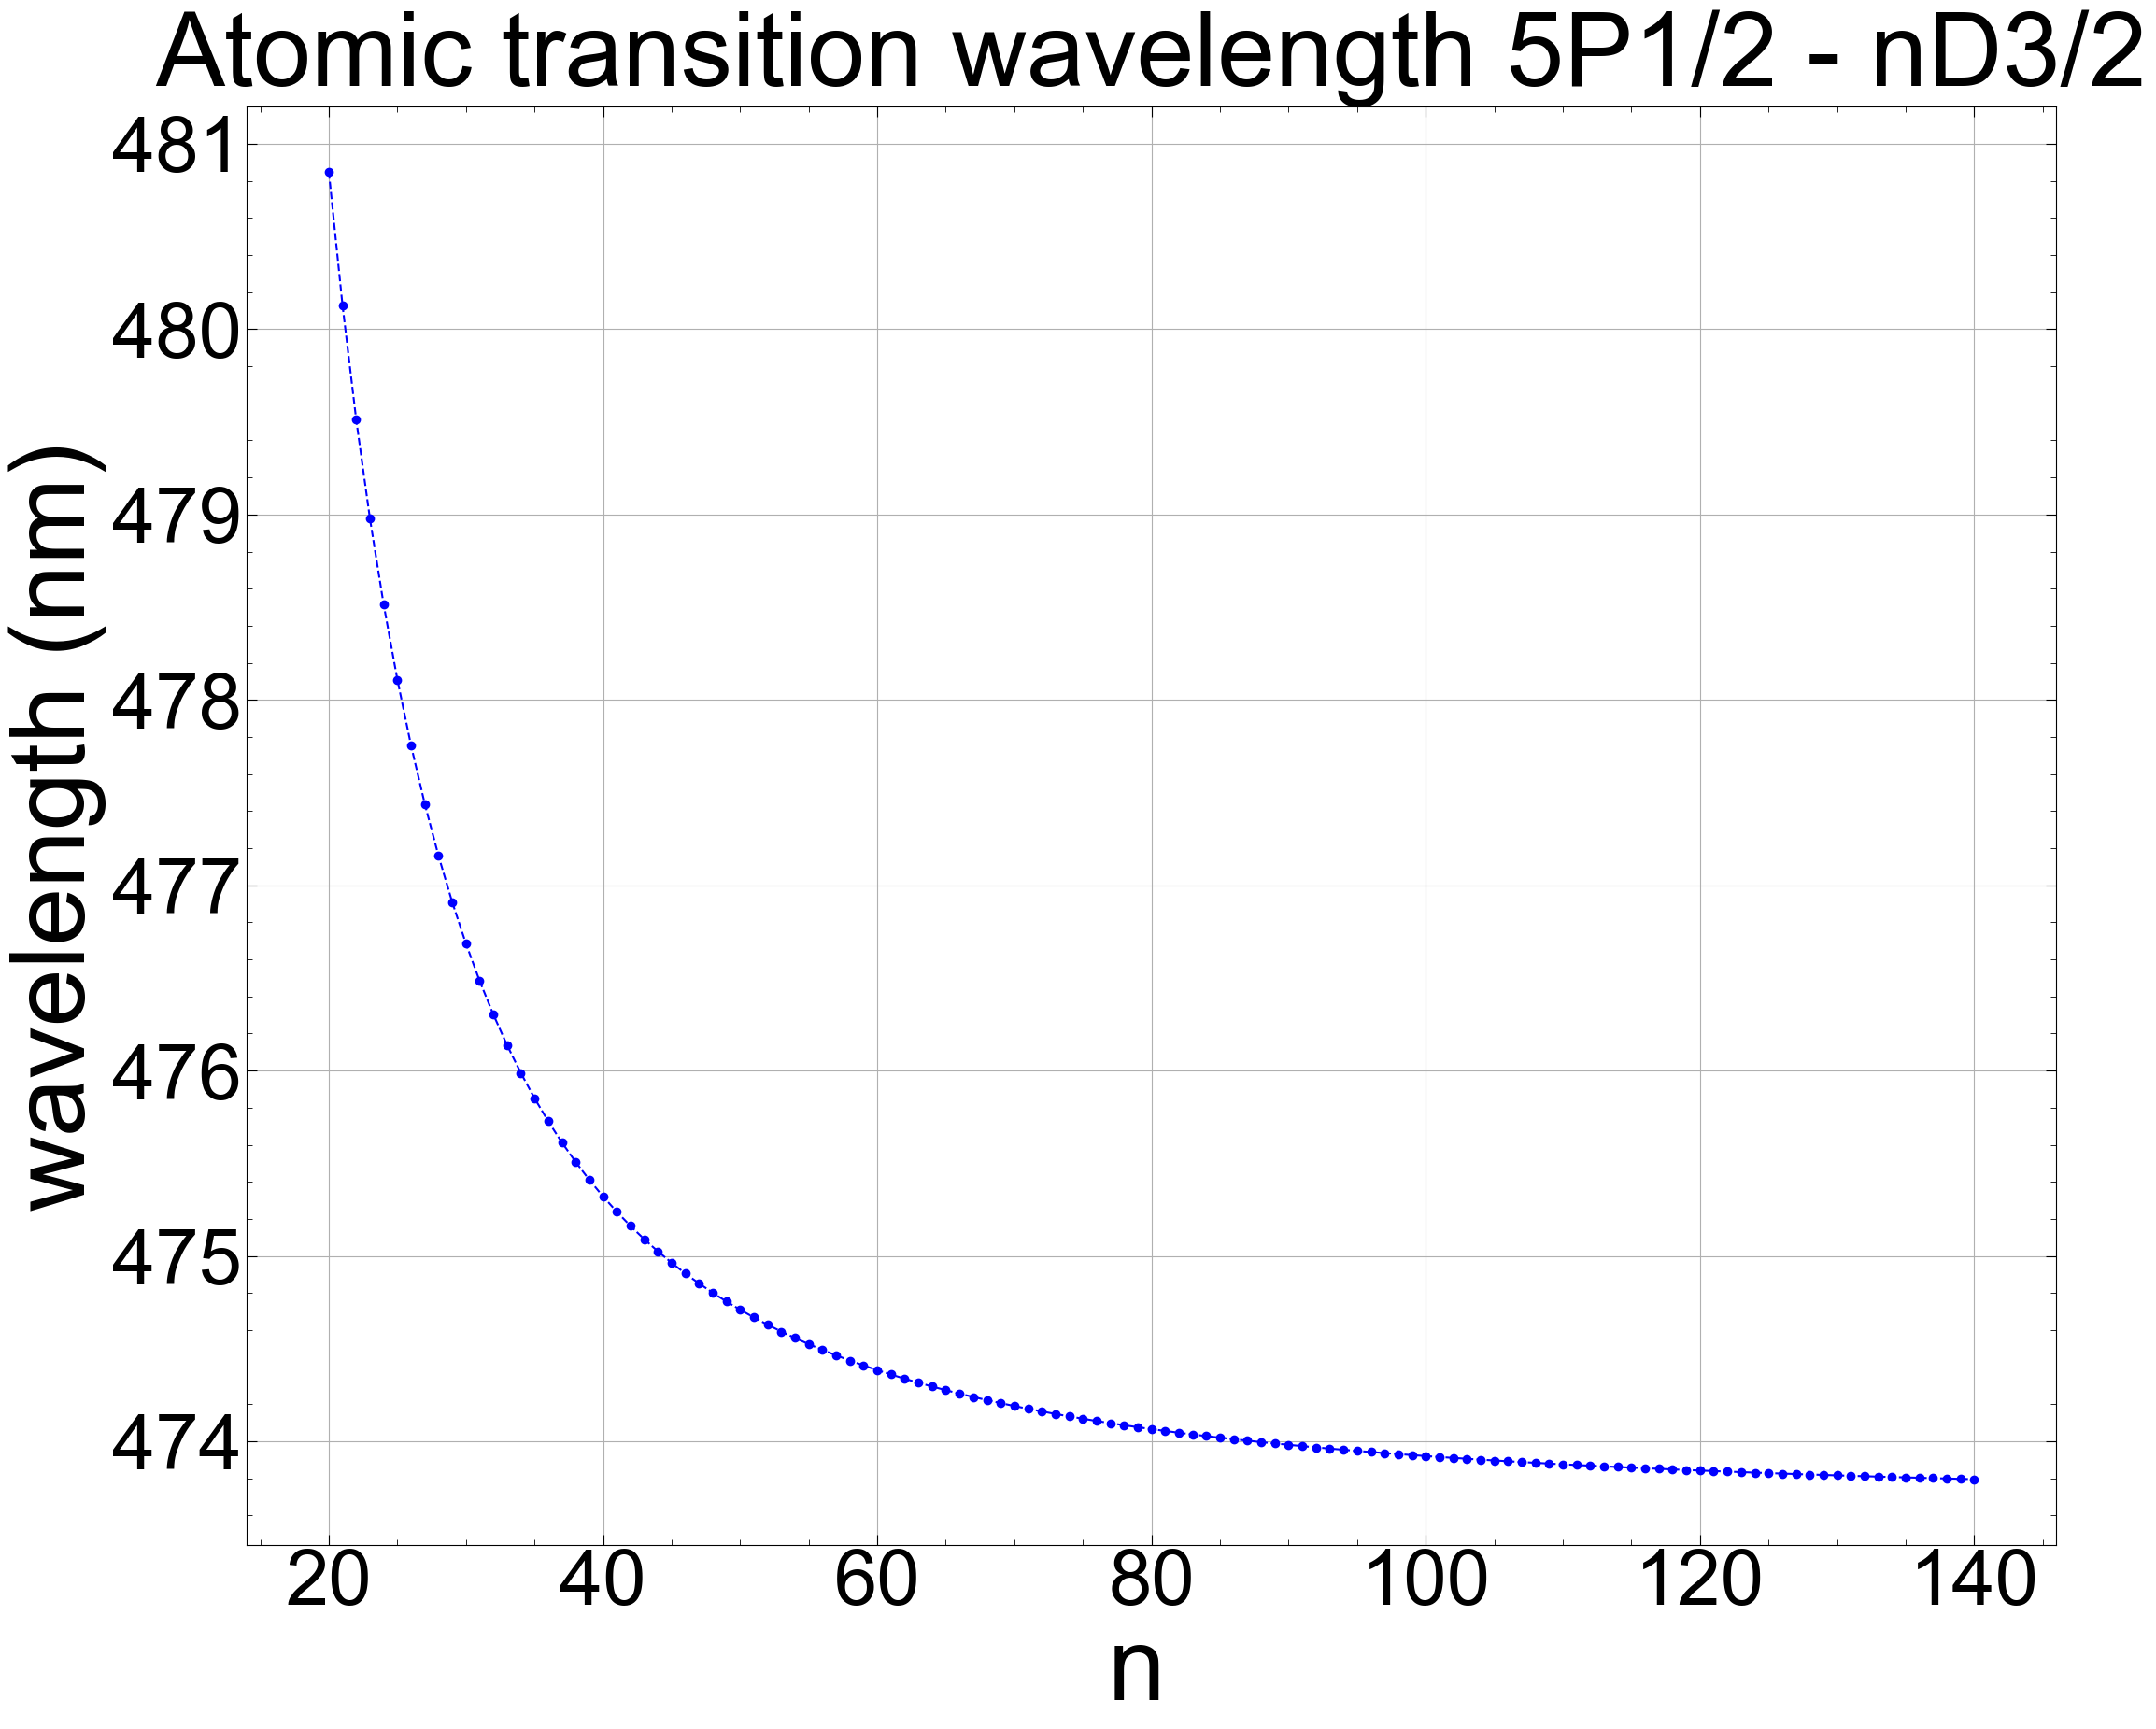

In [47]:
import matplotlib.pyplot as plt

# Set Arial font as the default font
plt.rcParams["font.family"] = "Arial"

def get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2):
    return atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9

def calculate_transition_wavelengths(start_n, end_n, l1, j1, l2, j2):
    wavelengths = []
    for n2 in range(start_n, end_n + 1):
        wavelength_nm = get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2)
        wavelengths.append(wavelength_nm)
    return wavelengths

# Quantum numbers for the initial state (5P_{1/2})
n1 = 5
l1 = 1
j1 = 0.5

# Quantum numbers for the final state (20D_{3/2} to 100D_{3/2})
start_n2 = 20
end_n2 = 140
l2 = 2
j2 = 1.5

# Calculate transition wavelengths
wavelengths = calculate_transition_wavelengths(start_n2, end_n2, l1, j1, l2, j2)

# Create a list of n values
n_values = list(range(start_n2, end_n2 + 1))

# Plot the graph
plt.figure(figsize=(25, 20))  # Increase the size of the graph
plt.plot(n_values, wavelengths, marker='o', linestyle='--', color='b')
plt.xlabel('n ', fontsize=80)  # Increase x-axis label font size
plt.ylabel('wavelength (nm)', fontsize=80)  # Increase y-axis label font size
plt.title('Atomic transition wavelength 5P1/2 - nD3/2', fontsize=80)  # Increase title font size
plt.grid(True)

# Set the font size of x and y tick labels
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

# Show legend
#plt.legend()

# Save the graph
plt.savefig('transition_wavelengths_5P0.5_D1.5.png', dpi=500)  # Save the graph to a file

plt.show()


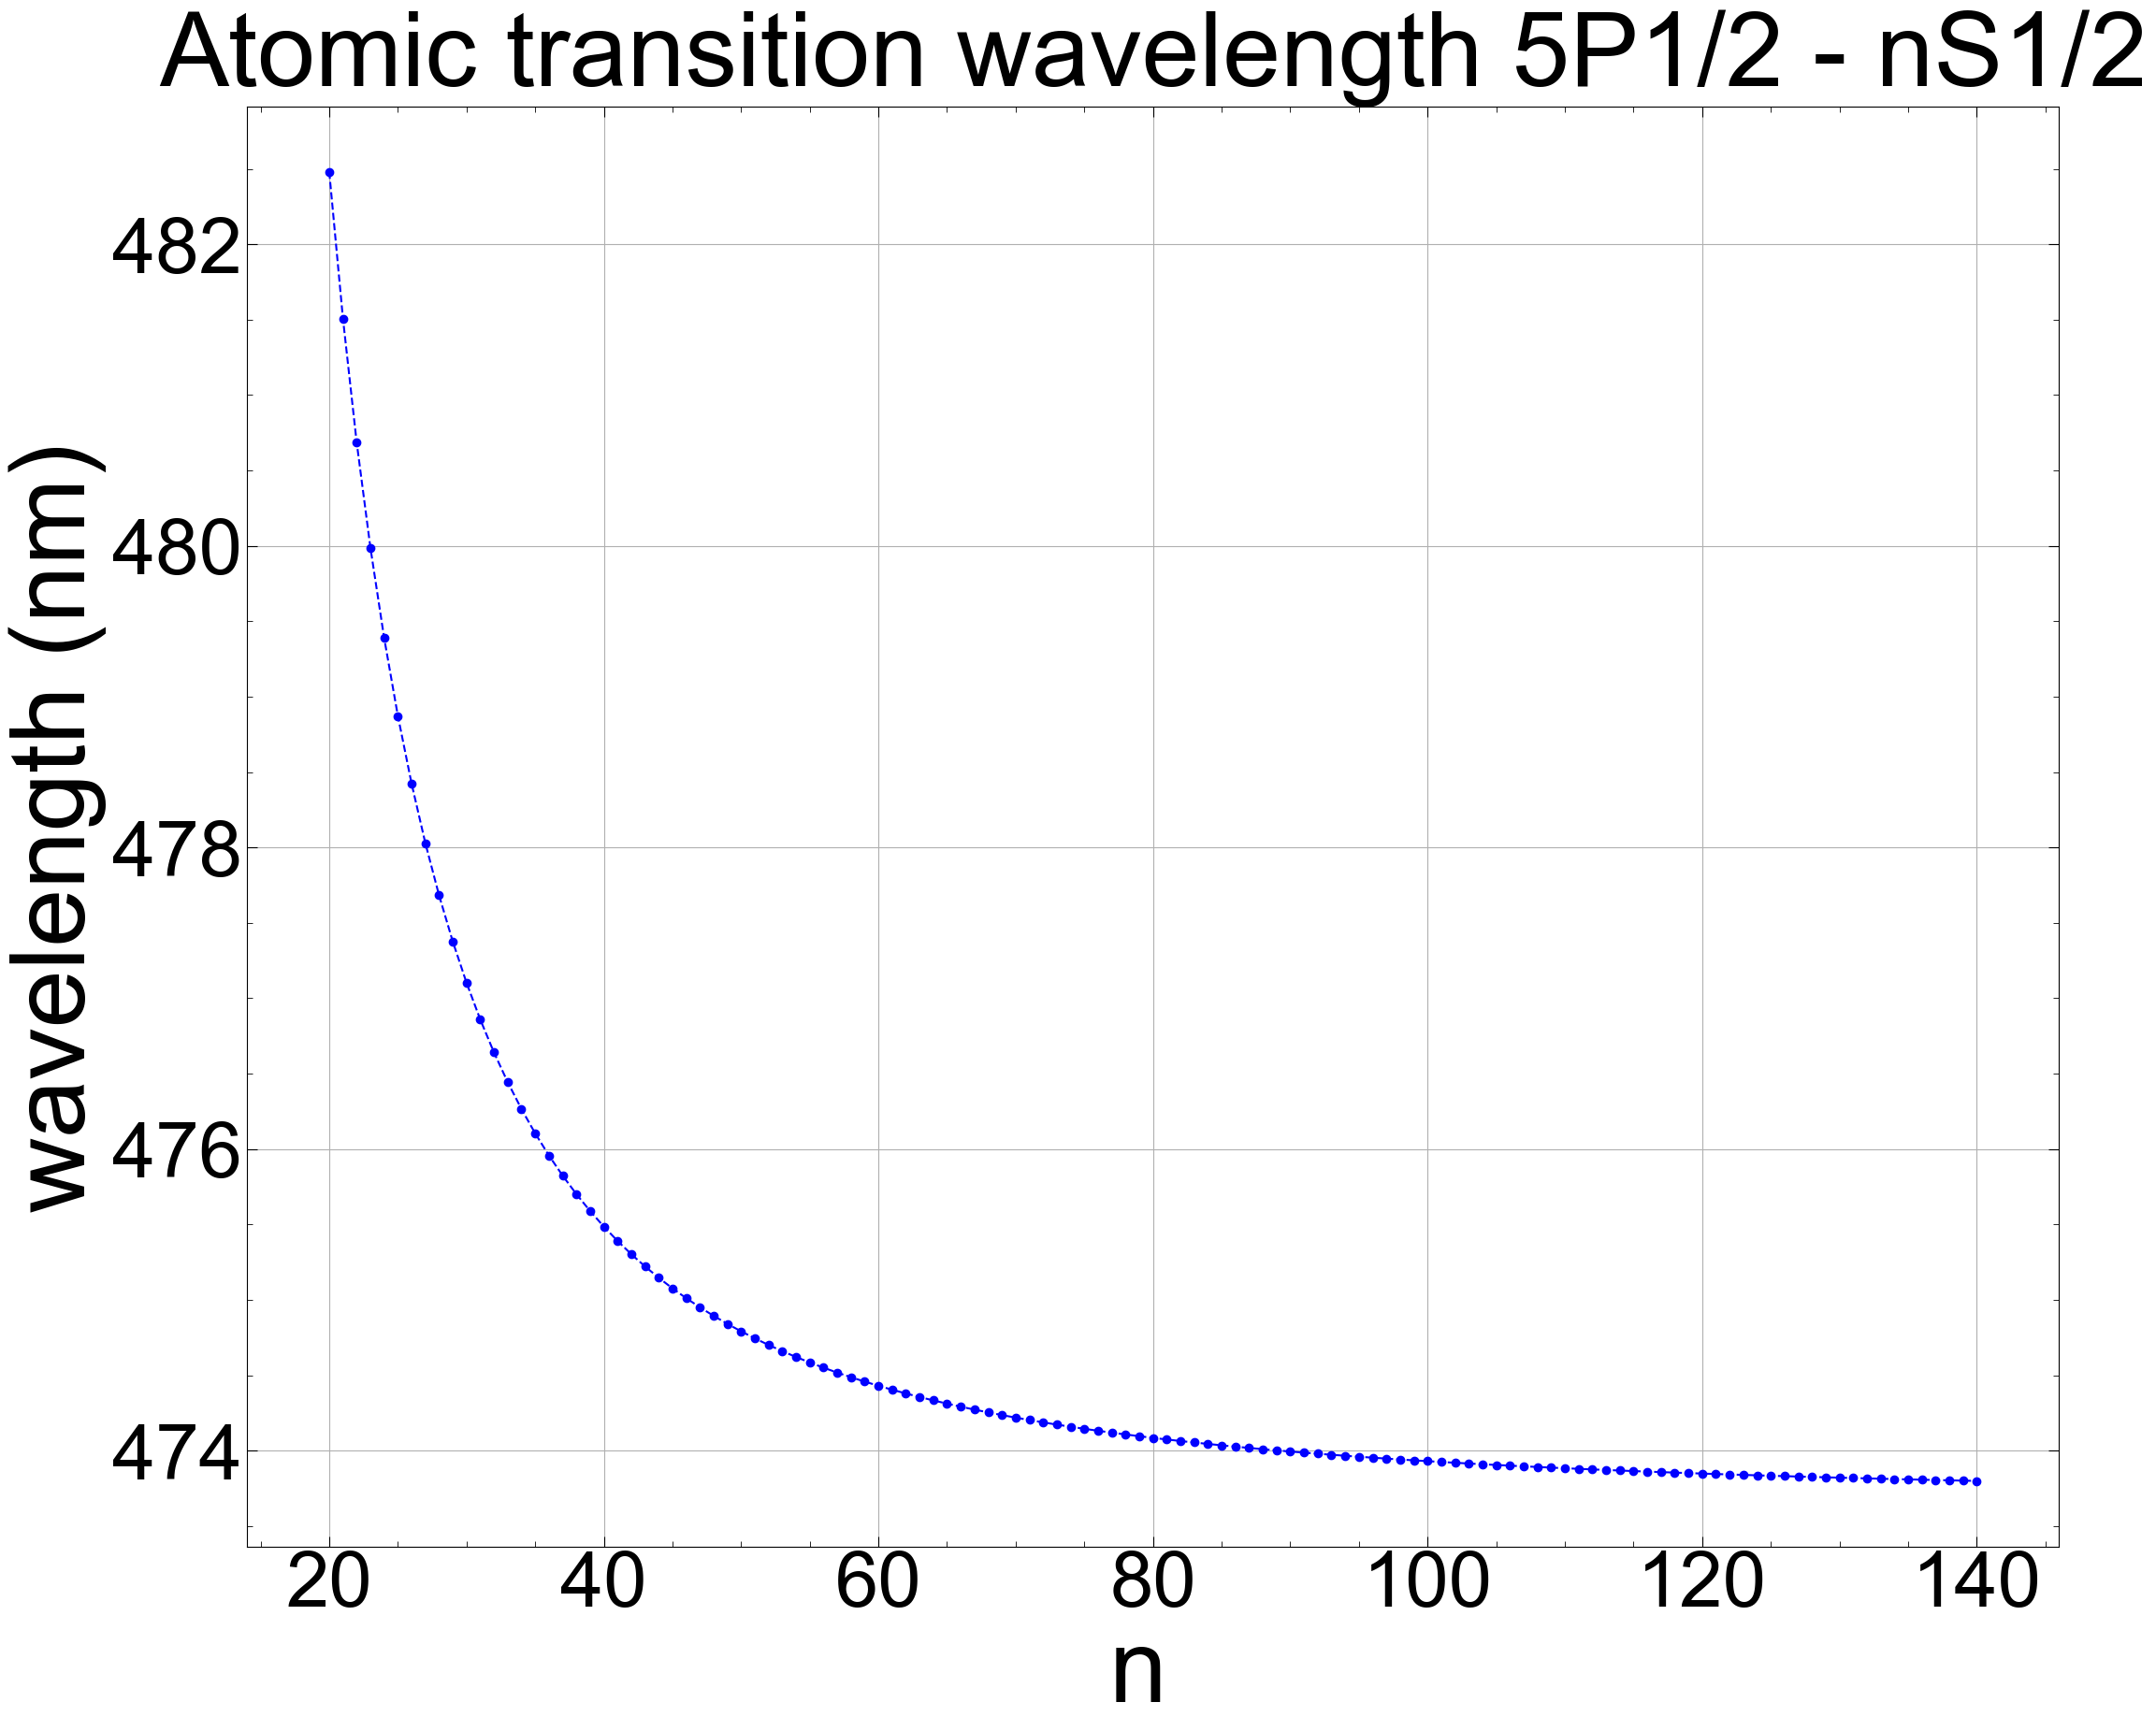

In [48]:
import matplotlib.pyplot as plt

# Set Arial font as the default font
plt.rcParams["font.family"] = "Arial"

def get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2):
    return atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9

def calculate_transition_wavelengths(start_n, end_n, l1, j1, l2, j2):
    wavelengths = []
    for n2 in range(start_n, end_n + 1):
        wavelength_nm = get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2)
        wavelengths.append(wavelength_nm)
    return wavelengths

# Quantum numbers for the initial state (5P_{1/2})
n1 = 5
l1 = 1
j1 = 0.5

# Quantum numbers for the final state (20D_{3/2} to 100D_{3/2})
start_n2 = 20
end_n2 = 140
l2 = 0
j2 = 0.5

# Calculate transition wavelengths
wavelengths = calculate_transition_wavelengths(start_n2, end_n2, l1, j1, l2, j2)

# Create a list of n values
n_values = list(range(start_n2, end_n2 + 1))

# Plot the graph
plt.figure(figsize=(25, 20))  # Increase the size of the graph
plt.plot(n_values, wavelengths, marker='o', linestyle='--', color='b')
plt.xlabel('n ', fontsize=80)  # Increase x-axis label font size
plt.ylabel('wavelength (nm)', fontsize=80)  # Increase y-axis label font size
plt.title('Atomic transition wavelength 5P1/2 - nS1/2', fontsize=80)  # Increase title font size
plt.grid(True)

# Set the font size of x and y tick labels
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

# Show legend
#plt.legend()

# Save the graph
plt.savefig('transition_wavelengths_5P0.5_S0.5.png', dpi=500)  # Save the graph to a file

plt.show()


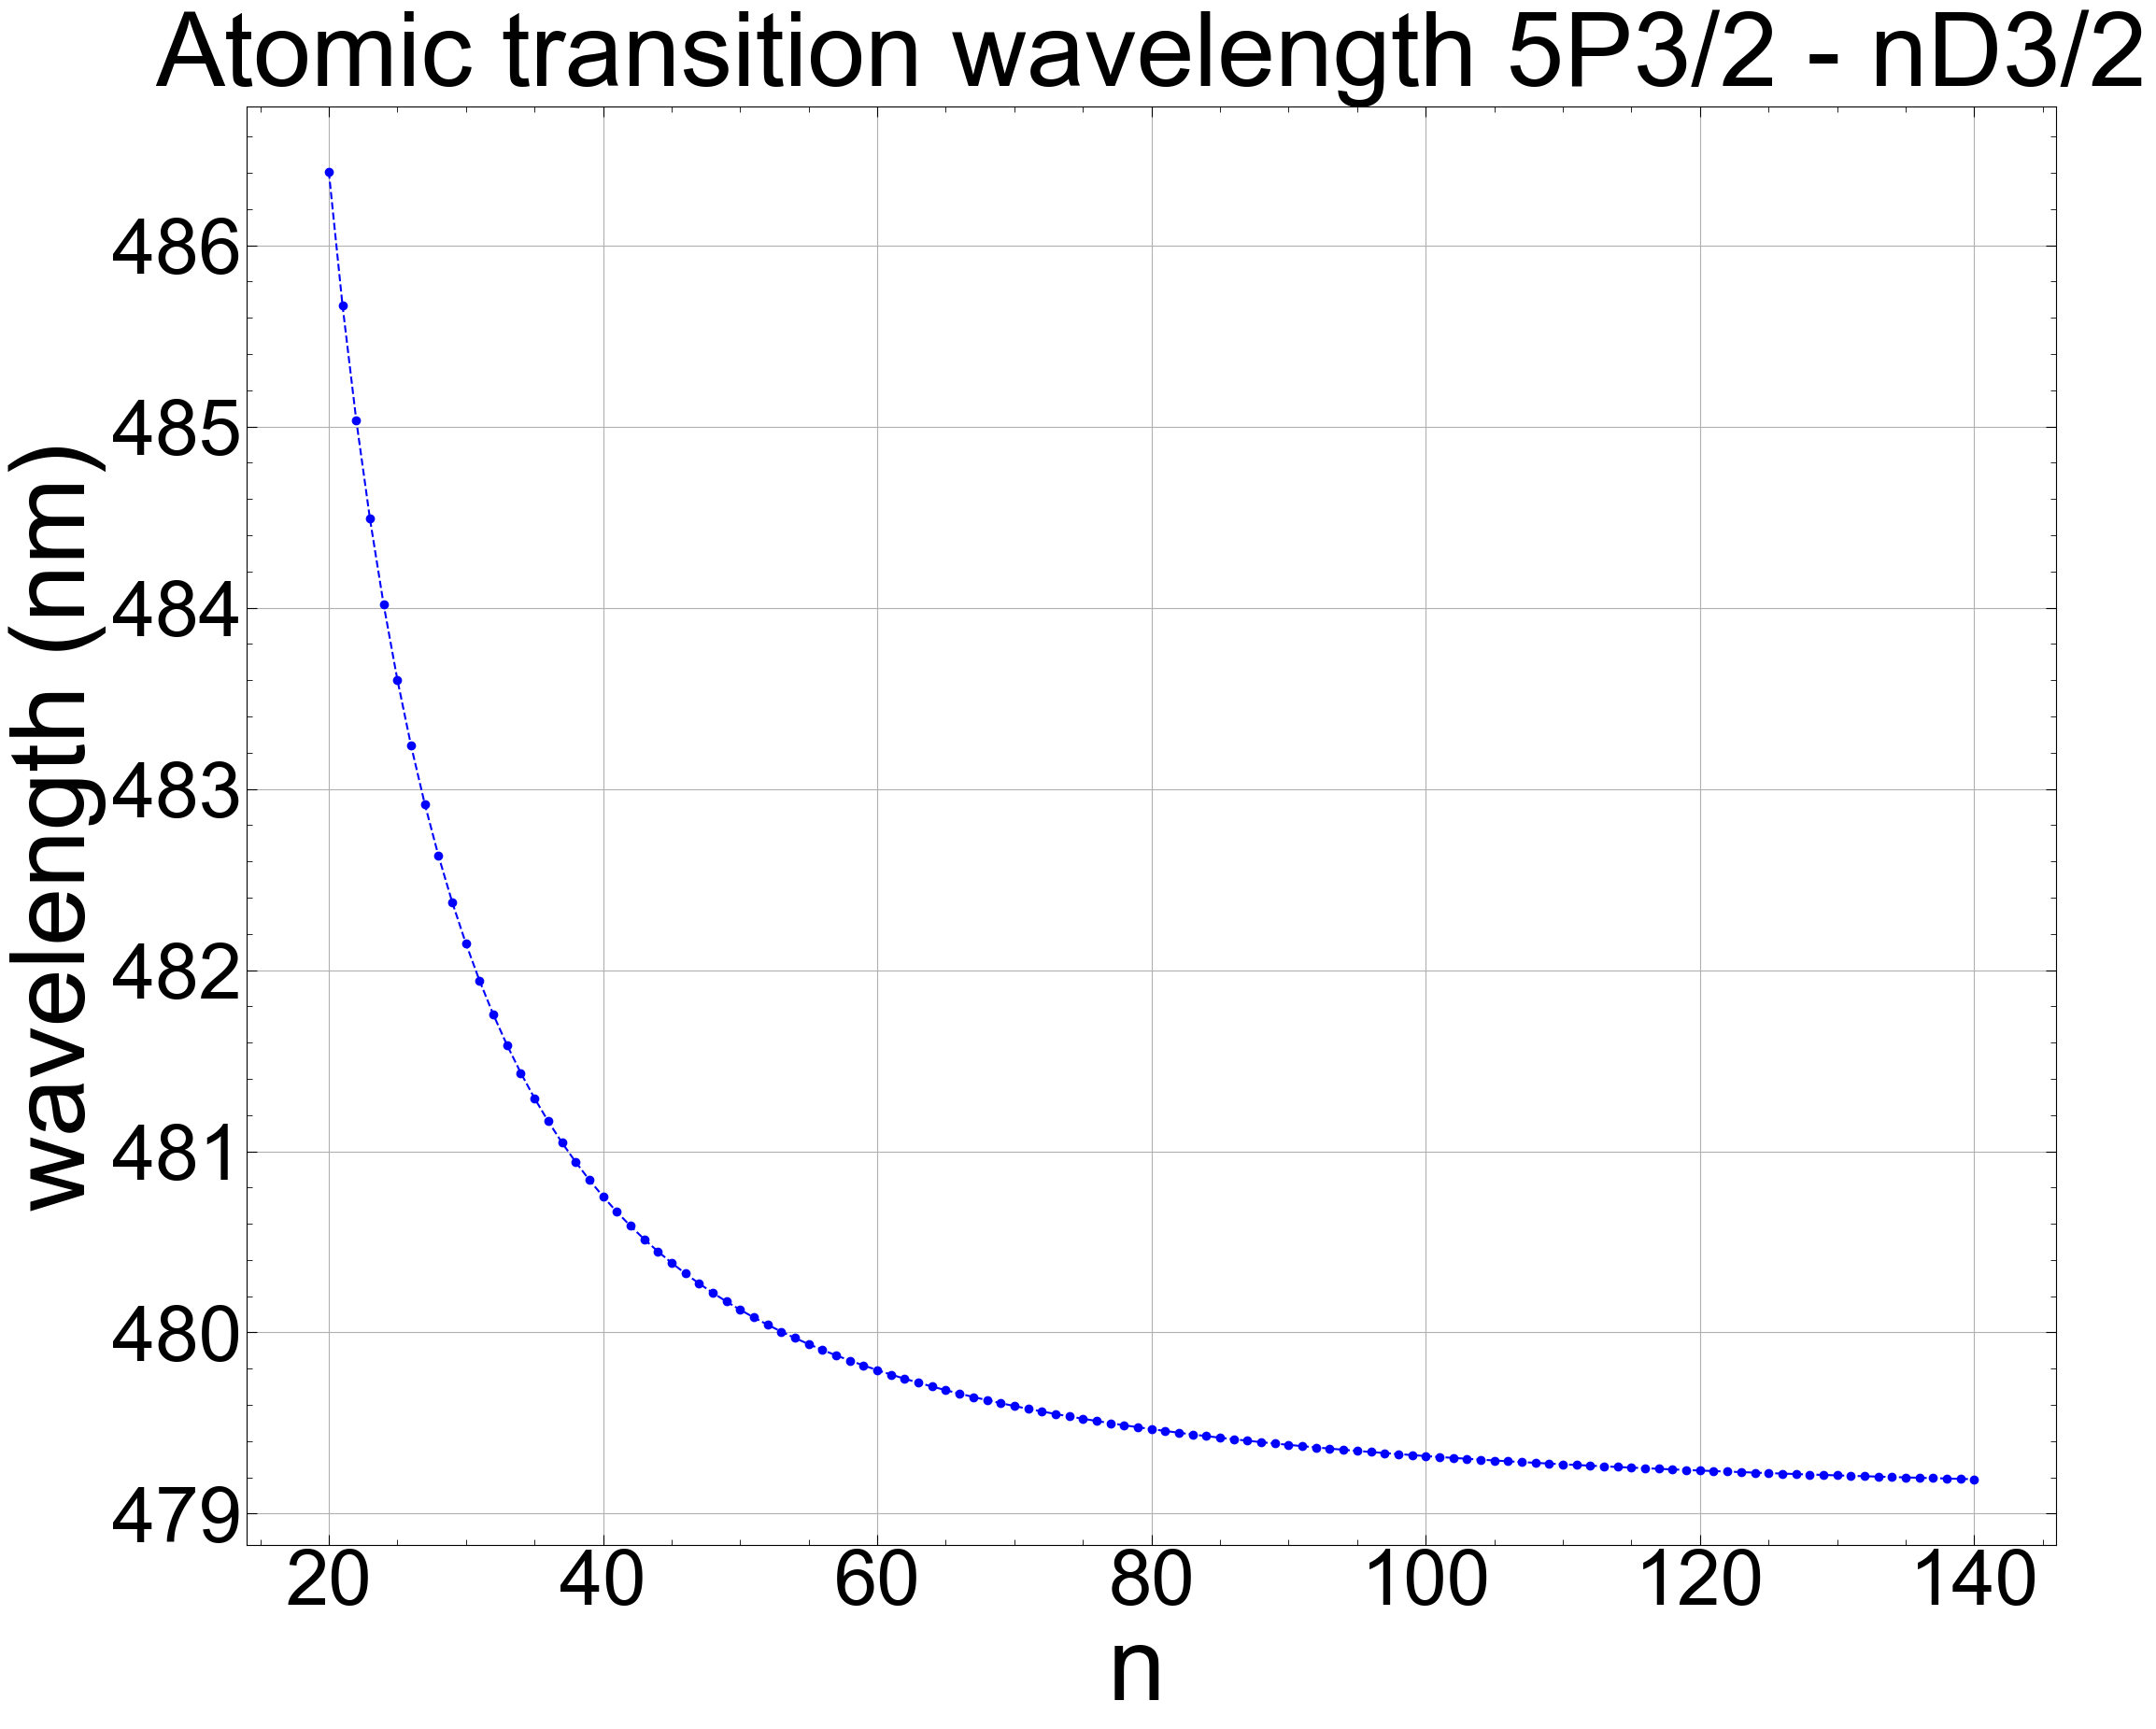

In [51]:
import matplotlib.pyplot as plt

# Set Arial font as the default font
plt.rcParams["font.family"] = "Arial"

def get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2):
    return atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9

def calculate_transition_wavelengths(start_n, end_n, l1, j1, l2, j2):
    wavelengths = []
    for n2 in range(start_n, end_n + 1):
        wavelength_nm = get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2)
        wavelengths.append(wavelength_nm)
    return wavelengths

# Quantum numbers for the initial state (5P_{1/2})
n1 = 5
l1 = 1
j1 = 1.5

# Quantum numbers for the final state (20D_{3/2} to 100D_{3/2})
start_n2 = 20
end_n2 = 140
l2 = 2
j2 = 1.5

# Calculate transition wavelengths
wavelengths = calculate_transition_wavelengths(start_n2, end_n2, l1, j1, l2, j2)

# Create a list of n values
n_values = list(range(start_n2, end_n2 + 1))

# Plot the graph
plt.figure(figsize=(25, 20))  # Increase the size of the graph
plt.plot(n_values, wavelengths, marker='o', linestyle='--', color='b')
plt.xlabel('n ', fontsize=80)  # Increase x-axis label font size
plt.ylabel('wavelength (nm)', fontsize=80)  # Increase y-axis label font size
plt.title('Atomic transition wavelength 5P3/2 - nD3/2', fontsize=80)  # Increase title font size
plt.grid(True)

# Set the font size of x and y tick labels
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

# Show legend
#plt.legend()

# Save the graph
plt.savefig('transition_wavelengths_5P1.5_D1.5.png', dpi=500)  # Save the graph to a file

plt.show()


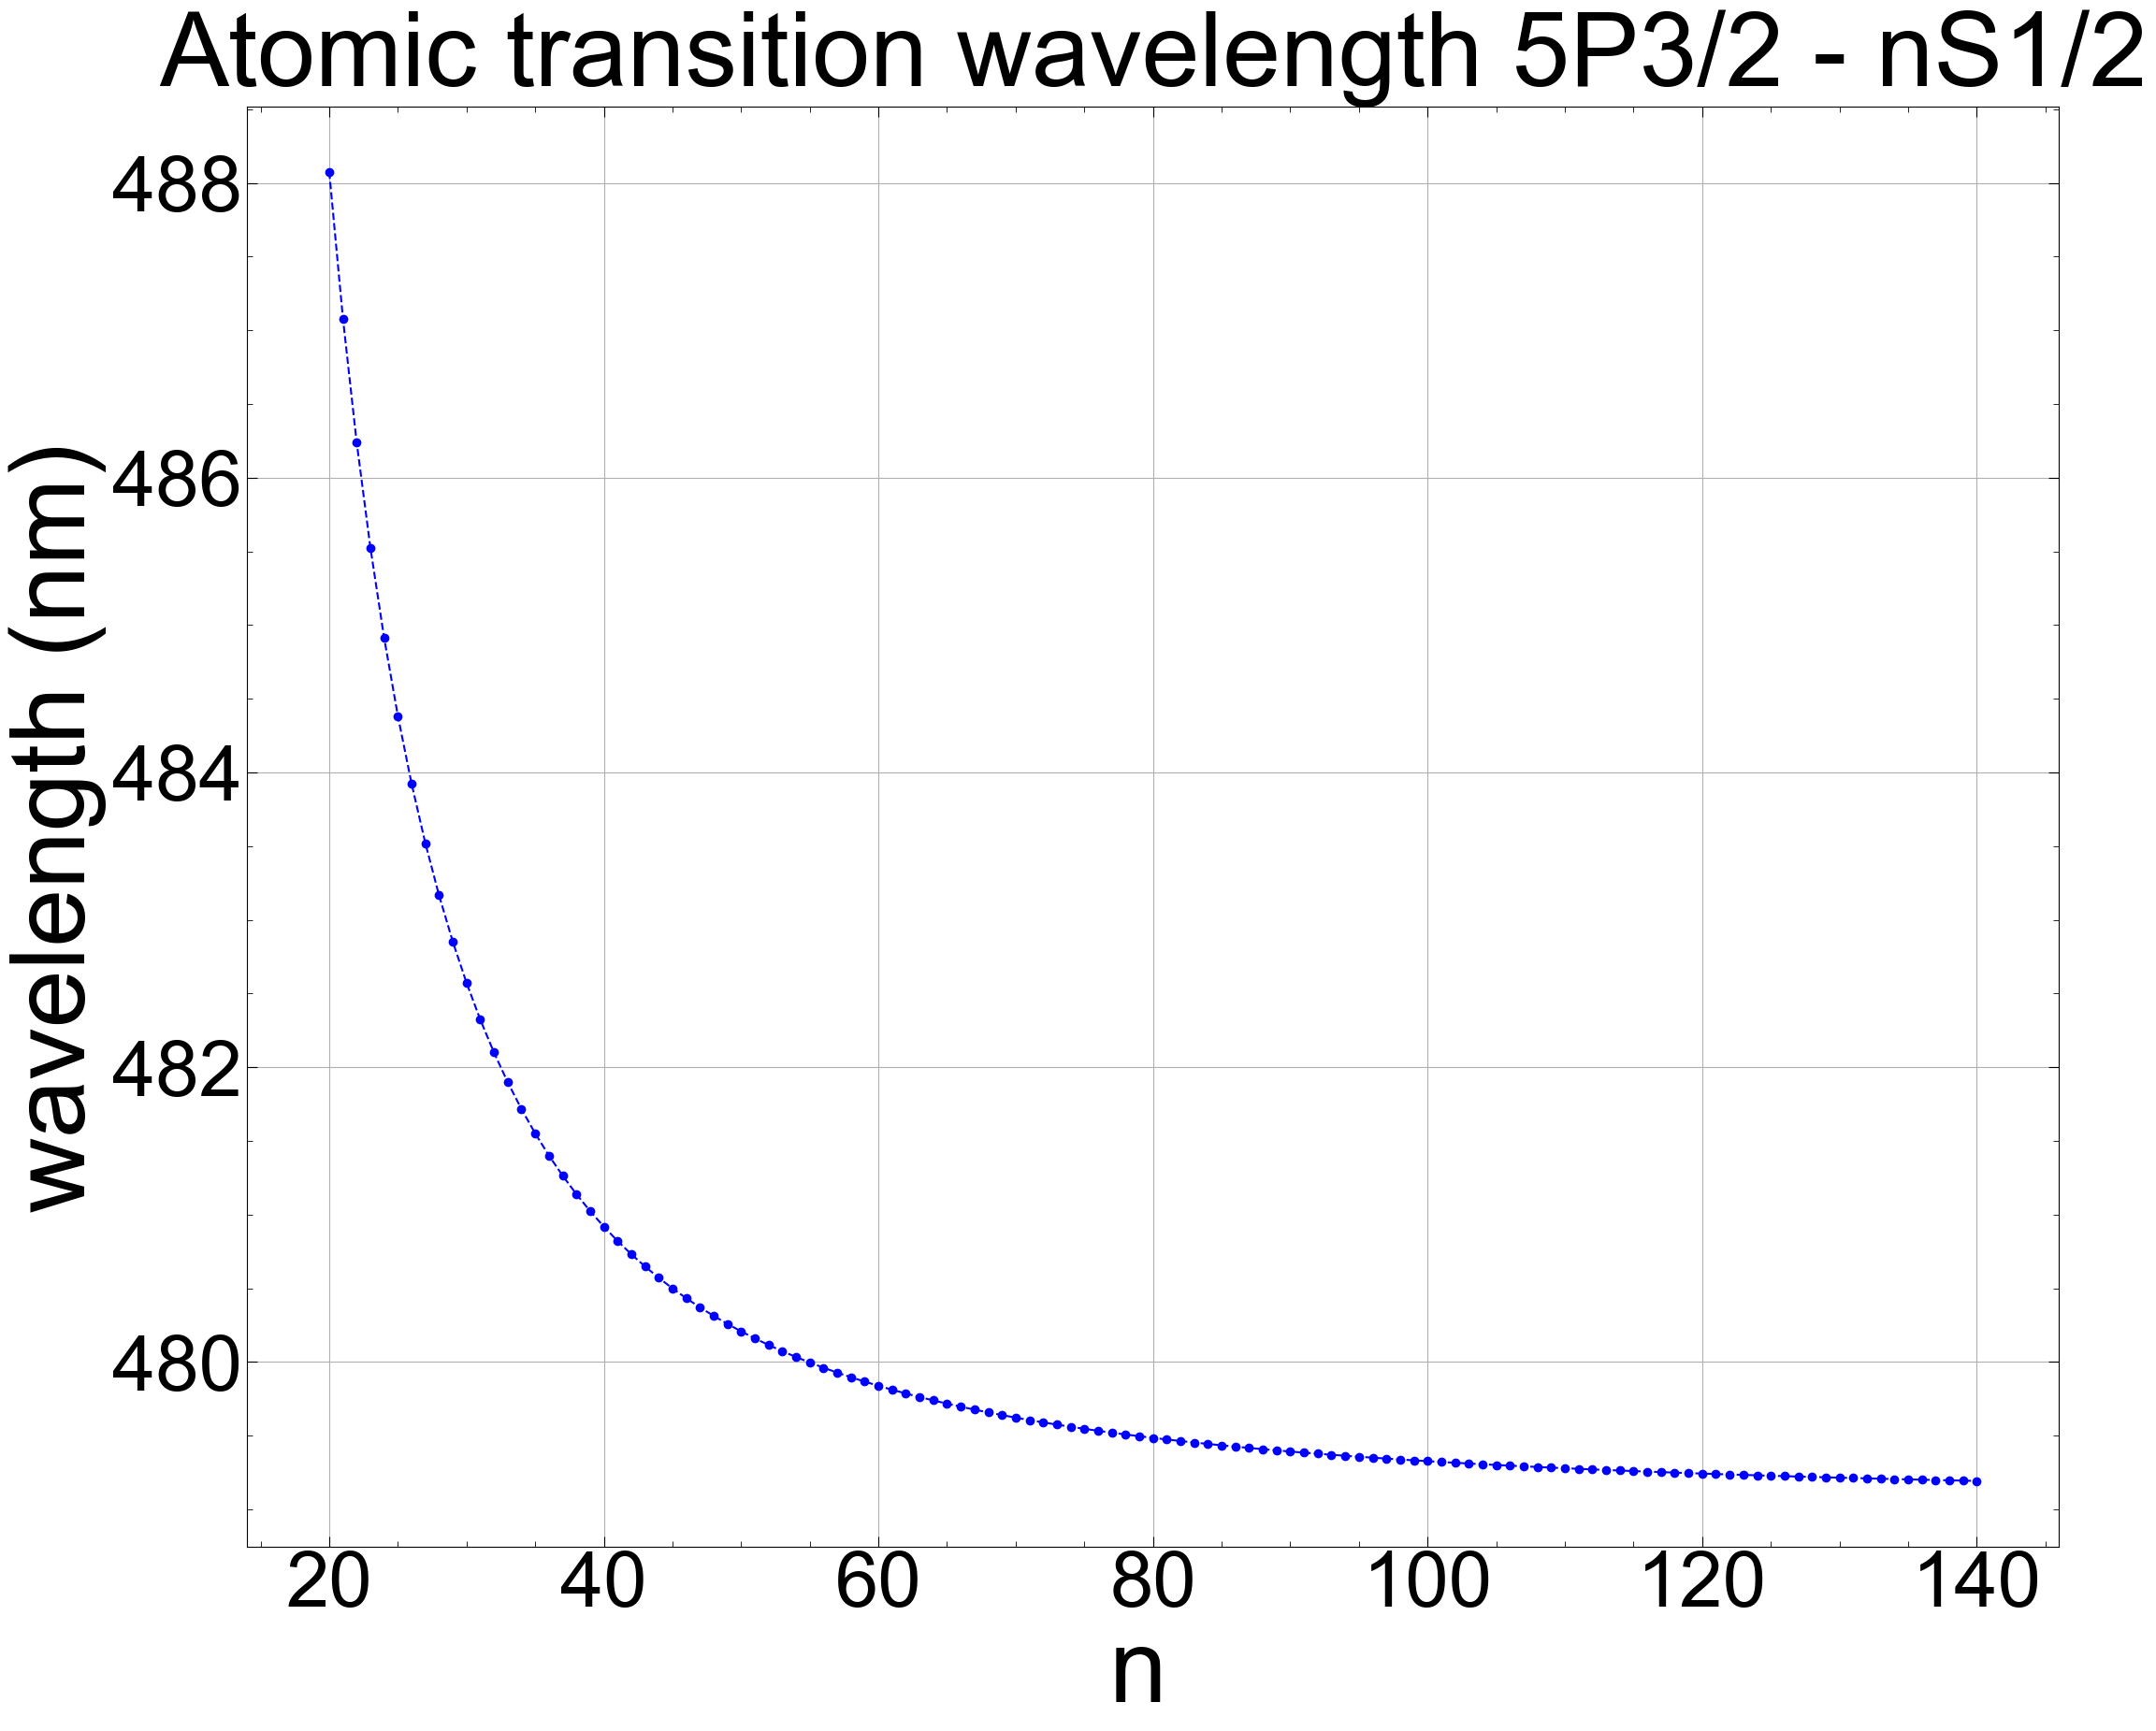

In [50]:
import matplotlib.pyplot as plt

# Set Arial font as the default font
plt.rcParams["font.family"] = "Arial"

def get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2):
    return atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9

def calculate_transition_wavelengths(start_n, end_n, l1, j1, l2, j2):
    wavelengths = []
    for n2 in range(start_n, end_n + 1):
        wavelength_nm = get_transition_wavelength(atom, n1, l1, j1, n2, l2, j2)
        wavelengths.append(wavelength_nm)
    return wavelengths

# Quantum numbers for the initial state (5P_{1/2})
n1 = 5
l1 = 1
j1 = 1.5

# Quantum numbers for the final state (20D_{3/2} to 100D_{3/2})
start_n2 = 20
end_n2 = 140
l2 = 0
j2 = 0.5

# Calculate transition wavelengths
wavelengths = calculate_transition_wavelengths(start_n2, end_n2, l1, j1, l2, j2)

# Create a list of n values
n_values = list(range(start_n2, end_n2 + 1))

# Plot the graph
plt.figure(figsize=(25, 20))  # Increase the size of the graph
plt.plot(n_values, wavelengths, marker='o', linestyle='--', color='b')
plt.xlabel('n ', fontsize=80)  # Increase x-axis label font size
plt.ylabel('wavelength (nm)', fontsize=80)  # Increase y-axis label font size
plt.title('Atomic transition wavelength 5P3/2 - nS1/2', fontsize=80)  # Increase title font size
plt.grid(True)

# Set the font size of x and y tick labels
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

# Show legend
#plt.legend()

# Save the graph
plt.savefig('transition_wavelengths_5P1.5_S0.5.png', dpi=500)  # Save the graph to a file

plt.show()


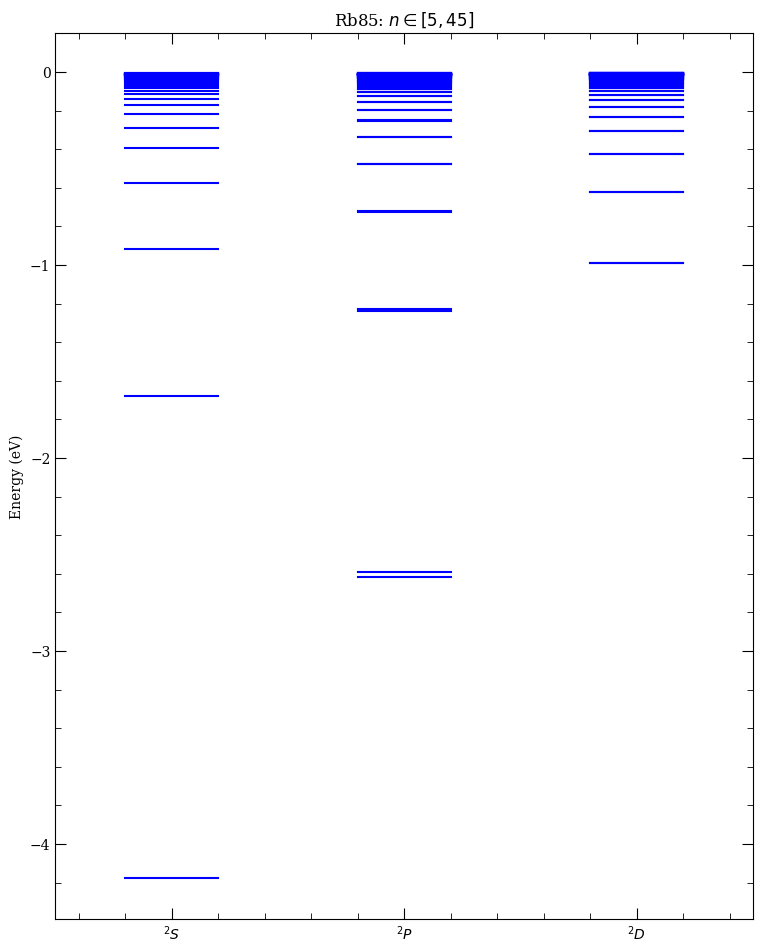

In [6]:
atom=Rubidium()

nmin=5
nmax=45
lmin=0
lmax=2

levels=LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax)
levels.drawLevels()
levels.showPlot()

1.3460866822577362


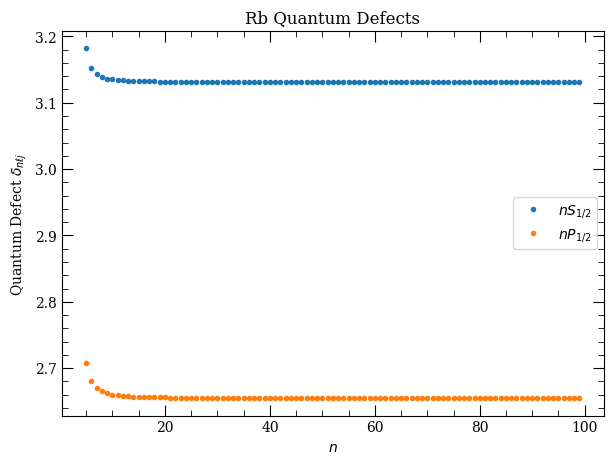

In [13]:
n = np.arange(5,100,1)

fig, axes = plt.subplots(1, 1, figsize=(7, 5))

axes.plot(n, atom.getQuantumDefect(n, 0, 0.5), ".", label="$nS_{1/2}$")
axes.plot(n, atom.getQuantumDefect(n, 1, 0.5), ".", label="$nP_{1/2}$")
axes.legend(loc=0)
axes.set_xlabel("$n$")
axes.set_ylabel("Quantum Defect $\delta_{n\ell j}$")
axes.set_title("Rb Quantum Defects")

print(atom.getQuantumDefect(41,2,2.5))

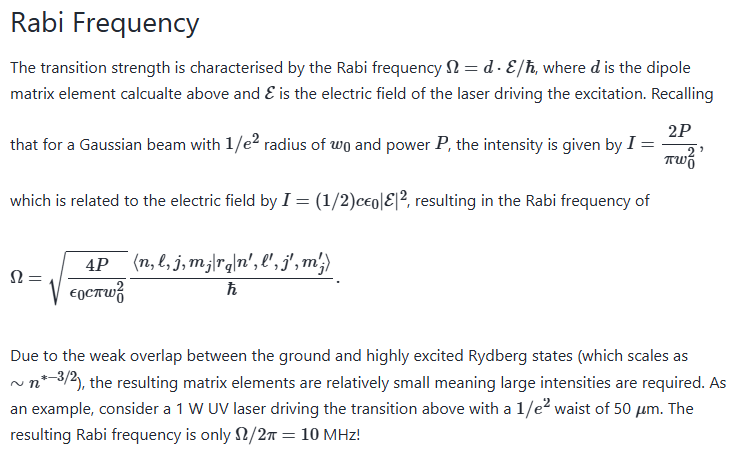

In [31]:
atom = Rubidium()
print("Rb Excitation 5S_{1/2} -> 5P_{1/2}")
n1 = 5
l1 = 0
j1 = 0.5
# Initial State
n2 = 5
l2 = 1
j2 = 0.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5S_{1/2} -> 5P_{1/2}
lambda = 794.979 nm
omega/2pi = 377.107 THz


In [33]:
# Laser Parameters
waist = 1e-3  # 1 mm
P = 10e-6 # 10 uW

mj1 = 0.5
mj2 = 0.5
q = +0
# Light Polarisation (sigma+)

rabiFreq = atom.getRabiFrequency(n1, l1, j1, mj1, n2, l2, j2, q, P, waist)
print("rabi Frequency = 2 pi x %.2f MHz" % (rabiFreq / (2 * np.pi) * 1e-6))

rabi Frequency = 2 pi x 1.53 MHz


In [34]:
atom = Rubidium()
print("Rb Excitation 5P_{1/2} -> 41D_{3/2}")
n1 = 5
l1 = 1
j1 = 0.5
# Initial State
n2 = 41
l2 = 2
j2 = 1.5
# Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 41D_{3/2}
lambda = 475.239 nm
omega/2pi = 630.825 THz


In [35]:
# Laser Parameters
waist = 1e-3  # 1 mm
P = 140e-3 # 140 mW

mj1 = 0.5
mj2 = 1.5
q = +0
# Light Polarisation (sigma+)

rabiFreq = atom.getRabiFrequency(n1, l1, j1, mj1, n2, l2, j2, q, P, waist)
print("rabi Frequency = 2 pi x %.2f MHz" % (rabiFreq / (2 * np.pi) * 1e-6))

rabi Frequency = 2 pi x 1.62 MHz
